#### Associations Between Quantitative and Categorical Variables

Examining the relationship between variables can give us key insight into our data. In this lesson, we will cover ways of assessing the association between a quantitative variable and a categorical variable.
we’ll explore a dataset that contains the following information about students at two portuguese schools:

- school: the school each student attends, Gabriel Periera ('GP') or Mousinho da Silveria ('MS')
- address: the location of the student’s home ('U' for urban and 'R' for rural)
- absences: the number of times the student was absent during the school year
- Mjob: the student’s mother’s job industry
- Fjob: the student’s father’s job industry
- G3: the student’s score on a math assessment, ranging from 0 to 20

Suppose we want to know: Is a student’s score (G3) associated with their school (school)? If so, then knowing what school a student attends gives us information about what their score is likely to be. For example, maybe students at one of the schools consistently score higher than students at the other school.

To start answering this question, it is useful to save scores from each school in two separate lists:

`scores_GP = students.G3[students.school == 'GP']`

`scores_MS = students.G3[students.school == 'MS']`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
students = pd.read_csv('../Datasets/students.csv')
students.head(3)

,school,address,absences,Mjob,Fjob,G3
0,GP,U,6,at_home,teacher,6
1,GP,U,4,at_home,other,6
2,GP,U,10,at_home,other,10


Suppose that we want to know whether there is an association between student math scores (G3) and the student’s address (urban or rural). Separate out G3 scores into two separate lists: one for students who live in an urban location ('U') and one for students who live in a rural location ('R')

In [3]:
#separate out scores for students who live in urban and rural locations:
scores_urban = students[students['address'] == 'U']['G3']
scores_rural = students[students['address'] == 'R']['G3']

Highly associated variables tend to have a large mean or median difference. 

In [4]:
#calculate means for each group:
scores_urban_mean = np.mean(scores_urban)
scores_rural_mean = np.mean(scores_rural)

#print mean scores:
print('Mean score - students w/ urban address:')
print(scores_urban_mean)
print('Mean score - students w/ rural address:')
print(scores_rural_mean)

#calculate mean difference:
mean_diff = scores_urban_mean - scores_rural_mean

#print mean difference
print('Mean difference:')
print(mean_diff)

#calculate medians for each group:
scores_urban_median = np.median(scores_urban)
scores_rural_median = np.median(scores_rural)

#print median scores
print('Median score - students w/ urban address:')
print(scores_urban_median)
print('Median score - students w/ rural address:')
print(scores_rural_median)

#calculate median difference
median_diff = scores_urban_median - scores_rural_median

#print median difference
print('Median difference:')
print(median_diff)


Mean score - students w/ urban address:
10.674267100977199
Mean score - students w/ rural address:
9.511363636363637
Mean difference:
1.1629034646135619
Median score - students w/ urban address:
11.0
Median score - students w/ rural address:
10.0
Median difference:
1.0


One way to get a better sense of spread is by looking at a visual representation of the data. Side-by-side box plots are useful in visualizing mean and median differences because they allow us to visually estimate the variation in the data. This can help us determine if mean or median differences are “large” or “small”.

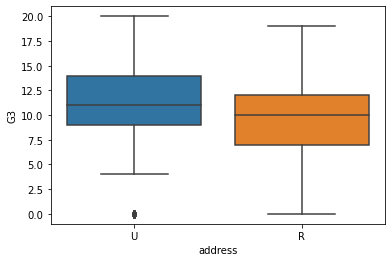

In [6]:
#create the boxplot here:
sns.boxplot(data = students, x = 'address', y = 'G3')
plt.show()

#### Inspecting Overlapping Histograms
Another way to explore the relationship between a quantitative and categorical variable in more detail is by inspecting overlapping histograms. In the code below, setting alpha = .5 ensures that the histograms are see-through enough that we can see both of them at once. We have also used normed=True make sure that the y-axis is a density rather than a frequency (note: the newest version of matplotlib renamed this parameter density instead of normed):

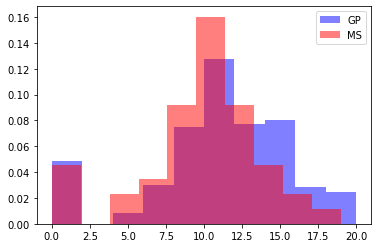

In [14]:
scores_GP = students[students['school'] == 'GP']['G3']
scores_MS = students[students['school'] == 'MS']['G3']

plt.hist(scores_GP , color="blue", label="GP", density = True, alpha=0.5)
plt.hist(scores_MS , color="red", label="MS", density = True, alpha=0.5)
plt.legend()
plt.show()

By inspecting this histogram, we can clearly see that the entire distribution of scores at GP (not just the mean or median) appears slightly shifted to the right (higher) compared to the scores at MS. However, there is also still a lot of overlap between the scores, suggesting that the association is relatively weak.

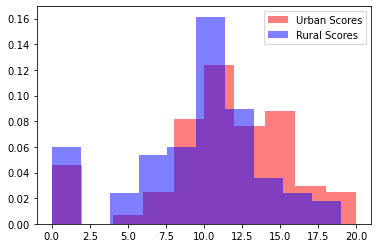

In [8]:
#create the overlapping histograms here:
plt.hist(scores_urban, alpha = 0.5, density = True, color = 'red', label = 'Urban Scores')
plt.hist(scores_rural, alpha = 0.5, density = True, color = 'blue', label = 'Rural Scores')
plt.legend()
plt.show()

#### Exploring Non-Binary Categorical Variables

In each of the previous exercises, we assessed whether there was an association between a quantitative variable (math scores) and a BINARY categorical variable (school). The categorical variable is considered binary because there are only two available options, either MS or GP. However, sometimes we are interested in an association between a quantitative variable and non-binary categorical variable. Non-binary categorical variables have more than two categories.

When looking at an association between a quantitative variable and a non-binary categorical variable, we must examine all pair-wise differences. For example, suppose we want to know whether or not an association exists between math scores (G3) and (Mjob), a categorical variable representing the mother’s job. This variable has five possible categories: `at_home`, `health`, `services`, `teacher`, or `other`. There are actually 10 different comparisons that we can make. For example, we can compare scores for students whose mothers work at_home or in `health; at_home or other; at home or `services; etc.. The easiest way to quickly visualize these comparisons is with side-by-side box plots:

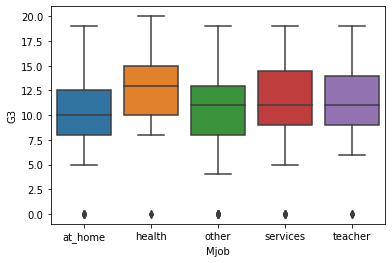

In [10]:
sns.boxplot(data = students, x = 'Mjob', y = 'G3')
plt.show()

Visually, we need to compare each box to every other box. While most of these boxes overlap with each other, there are some pairs for which there are some apparent differences. For example, scores appear to be higher among students with mothers working in health than among students with mothers working at home or in an “other” job. If there are ANY pairwise differences, we can say that the variables are associated; however, it is more useful to specifically report which groups are different.

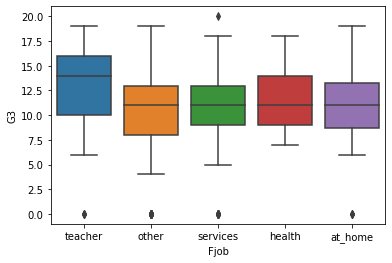

In [11]:
sns.boxplot(data = students, y = 'G3', x = 'Fjob')
plt.show()


#### Associations in the titanic data

In [18]:
titanic = pd.read_csv('../Datasets/titanic.csv')
#Mean fare paid by survivors
fare_survivors = titanic[titanic['Survived'] == 1]['Fare']
mean_fare_survivors = np.mean(fare_survivors)
print('Average fare paid by survivors is {}'.format(mean_fare_survivors))

#Mean fare paid by nonsurvivors
fare_dead_victims = titanic[titanic['Survived'] == 0]['Fare']
mean_fare_dead_victims = np.mean(fare_dead_victims)
print('Average fare paid by non-survivors is {}'.format(mean_fare_dead_victims))


diff_means = mean_fare_survivors - mean_fare_dead_victims
print('Difference in means: {}'.format(diff_means))

Average fare paid by survivors is 37.80299847560977
Average fare paid by non-survivors is 19.7208009208103
Difference in means: 18.082197554799468


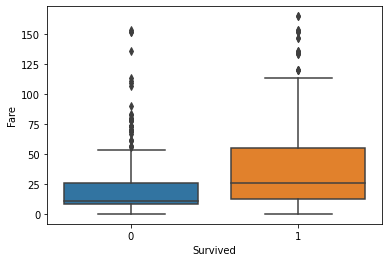

In [20]:
sns.boxplot(data = titanic, x = 'Survived', y = 'Fare')
plt.show()

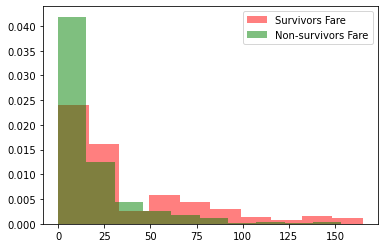

In [21]:
#Overlapping Histograms
plt.hist(fare_survivors, alpha = 0.5, density = True, color = 'red', label = 'Survivors Fare')
plt.hist(fare_dead_victims, alpha = 0.5, density = True, color = 'green', label = 'Non-survivors Fare' )
plt.legend()
plt.show()

#### Associations Two Quantitative Variables
When associations exist between variables, it means that information about the value of one variable gives us information about the value of the other variable.
We'll examine some data about Texas housing rentals on Craigslist — an online classifieds site. The data dictionary is as follows:

- `price`: monthly rental price in U.S.D.
- `type`: type of housing (eg., 'apartment', 'house', 'condo', etc.)
- `sqfeet`: housing area, in square feet
- `beds`: number of beds
- `baths`: number of baths
- `lat`: latitude
- `long`: longitude

Except for type, all of these variables are quantitative. Which pairs of variables do you think might be associated? For example, does knowing something about price give you any information about square footage?

In [24]:
housing = pd.read_csv('../Datasets/housing.csv')

#print the first 10 rows of data:
print(housing.head(10))

   price       type  sqfeet  beds  baths      lat      long
0    615  apartment     364     0    1.0  35.1653 -101.8840
1   1346  apartment     816     1    1.0  32.9865  -96.6860
2    900  apartment     500     1    1.0  30.2355  -97.7292
3    650  apartment     700     1    1.0  26.1923  -98.2657
4   1330  apartment    1040     2    2.0  30.6380  -96.2940
5    915  apartment     620     1    1.0  29.8754  -97.9404
6   1600      house    1578     3    2.0  32.6412  -97.1058
7    349  apartment     275     0    1.0  33.5865 -101.8610
8    695      house     650     1    1.0  31.5525  -97.1604
9    889  apartment     650     1    1.5  29.8754  -97.9404


#### Scatter Plots
One of the best ways to quickly visualize the relationship between quantitative variables is to plot them against each other in a scatter plot. This makes it easy to look for patterns or trends in the data. Let’s start by plotting the area of a rental against it’s monthly price to see if we can spot any patterns.

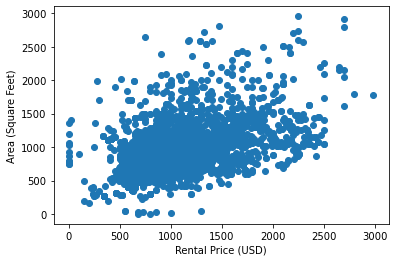

In [25]:
plt.scatter(x = housing.price, y = housing.sqfeet)
plt.xlabel('Rental Price (USD)')
plt.ylabel('Area (Square Feet)')
plt.show()

While there’s a lot of variation in the data, it seems like more expensive housing tends to come with slightly more space. This suggests an association between these two variables.

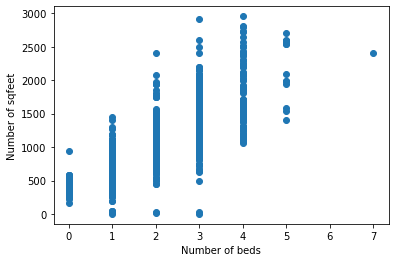

In [26]:
plt.scatter(x = housing['beds'], y = housing['sqfeet'])
plt.xlabel('Number of beds')
plt.ylabel('Number of sqfeet')
plt.show()